In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Load the CSV directly from the URL
url = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/aefi.csv"
data = pd.read_csv(url)

# Convert the 'date' column to datetime, allowing mixed formats
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# Define the date range
start_date = '2021-04-15'
end_date = '2021-10-15'

# Filter the data within the specified date range
data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Keep only the required columns
columns_to_keep = [
    'vaxtype', 'daily_total', 'daily_serious_npra', 'daily_nonserious_npra', 
    'd1_site_pain', 'd2_site_pain', 'd1_headache', 'd2_headache', 'd1_fever', 'd2_fever'
]

data = data[columns_to_keep]

# Display the filtered data
print(data.head(5))
print(data.describe())
print(data.info())

    vaxtype  daily_total  daily_serious_npra  daily_nonserious_npra  \
66   pfizer         1605                   6                    107   
67  sinovac           66                   0                      6   
68   pfizer          784                   0                     76   
69  sinovac           60                   0                      5   
70   pfizer          325                   0                      2   

    d1_site_pain  d2_site_pain  d1_headache  d2_headache  d1_fever  d2_fever  
66           647           362          373          194       123        93  
67            29             0           27            0         6         0  
68           376           106          230           65        50        22  
69            18             0           24            0         3         0  
70           213            21          126           12        22         2  
       daily_total  daily_serious_npra  daily_nonserious_npra  d1_site_pain  \
count   532.000000  

C:\Users\cheng\AppData\Local\Temp\ipykernel_12468\2011326203.py:12: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')


EDA PART 

In [3]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))
# check for any categorical variables

Categorical variables: 1


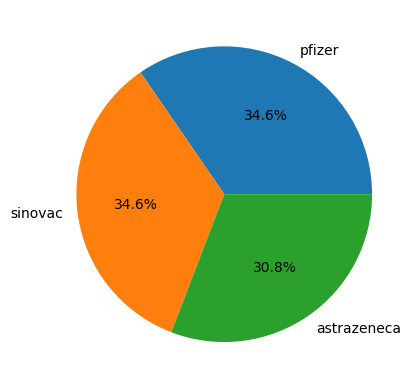

In [4]:
# Examine VaxType
# Perform analysis for categorical variable
temp = data['vaxtype'].value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 

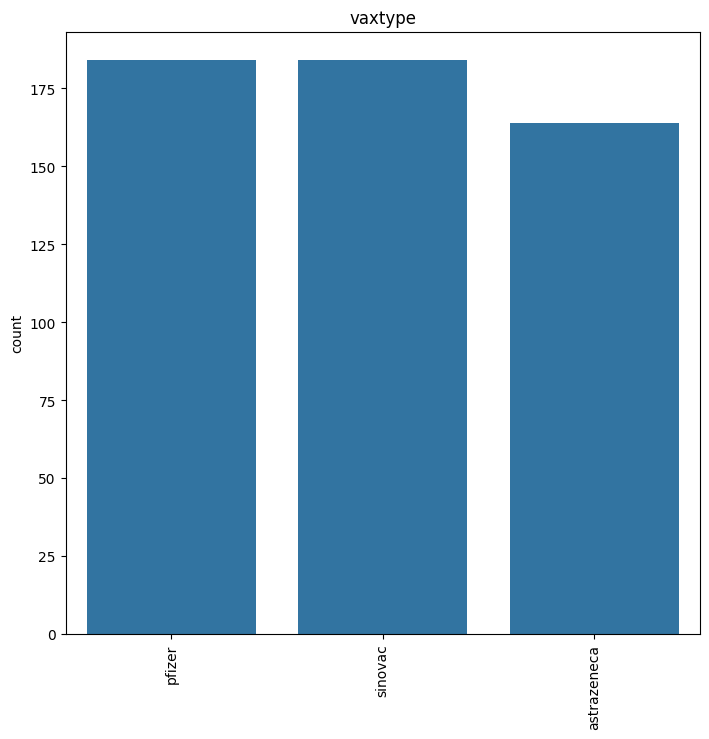

In [5]:
# Check the count of each vaccine
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(4,2,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  plt.title(col)
  index +=1

In [6]:
# One-hot encode the 'vaxtype' column
vaxtype_mapping = {'pfizer': 0, 'sinovac': 1, 'astrazeneca': 2, 'sinopharm': 3}
data['vaxtype'] = data['vaxtype'].map(vaxtype_mapping)


In [7]:
# Display the filtered data with encoded vaxtype
print(data.head())

    vaxtype  daily_total  daily_serious_npra  daily_nonserious_npra  \
66        0         1605                   6                    107   
67        1           66                   0                      6   
68        0          784                   0                     76   
69        1           60                   0                      5   
70        0          325                   0                      2   

    d1_site_pain  d2_site_pain  d1_headache  d2_headache  d1_fever  d2_fever  
66           647           362          373          194       123        93  
67            29             0           27            0         6         0  
68           376           106          230           65        50        22  
69            18             0           24            0         3         0  
70           213            21          126           12        22         2  


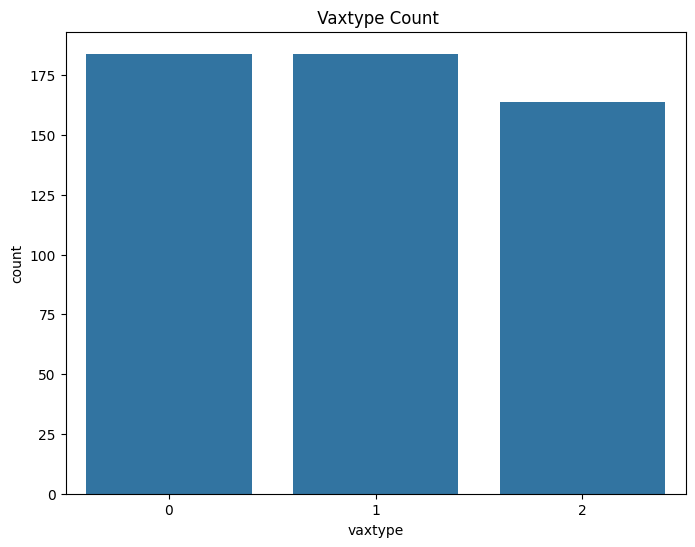

In [8]:
# Plot to verify the encoding
plt.figure(figsize=(8,6))
sns.countplot(x='vaxtype', data=data)
plt.title(' Vaxtype Count')
plt.show()

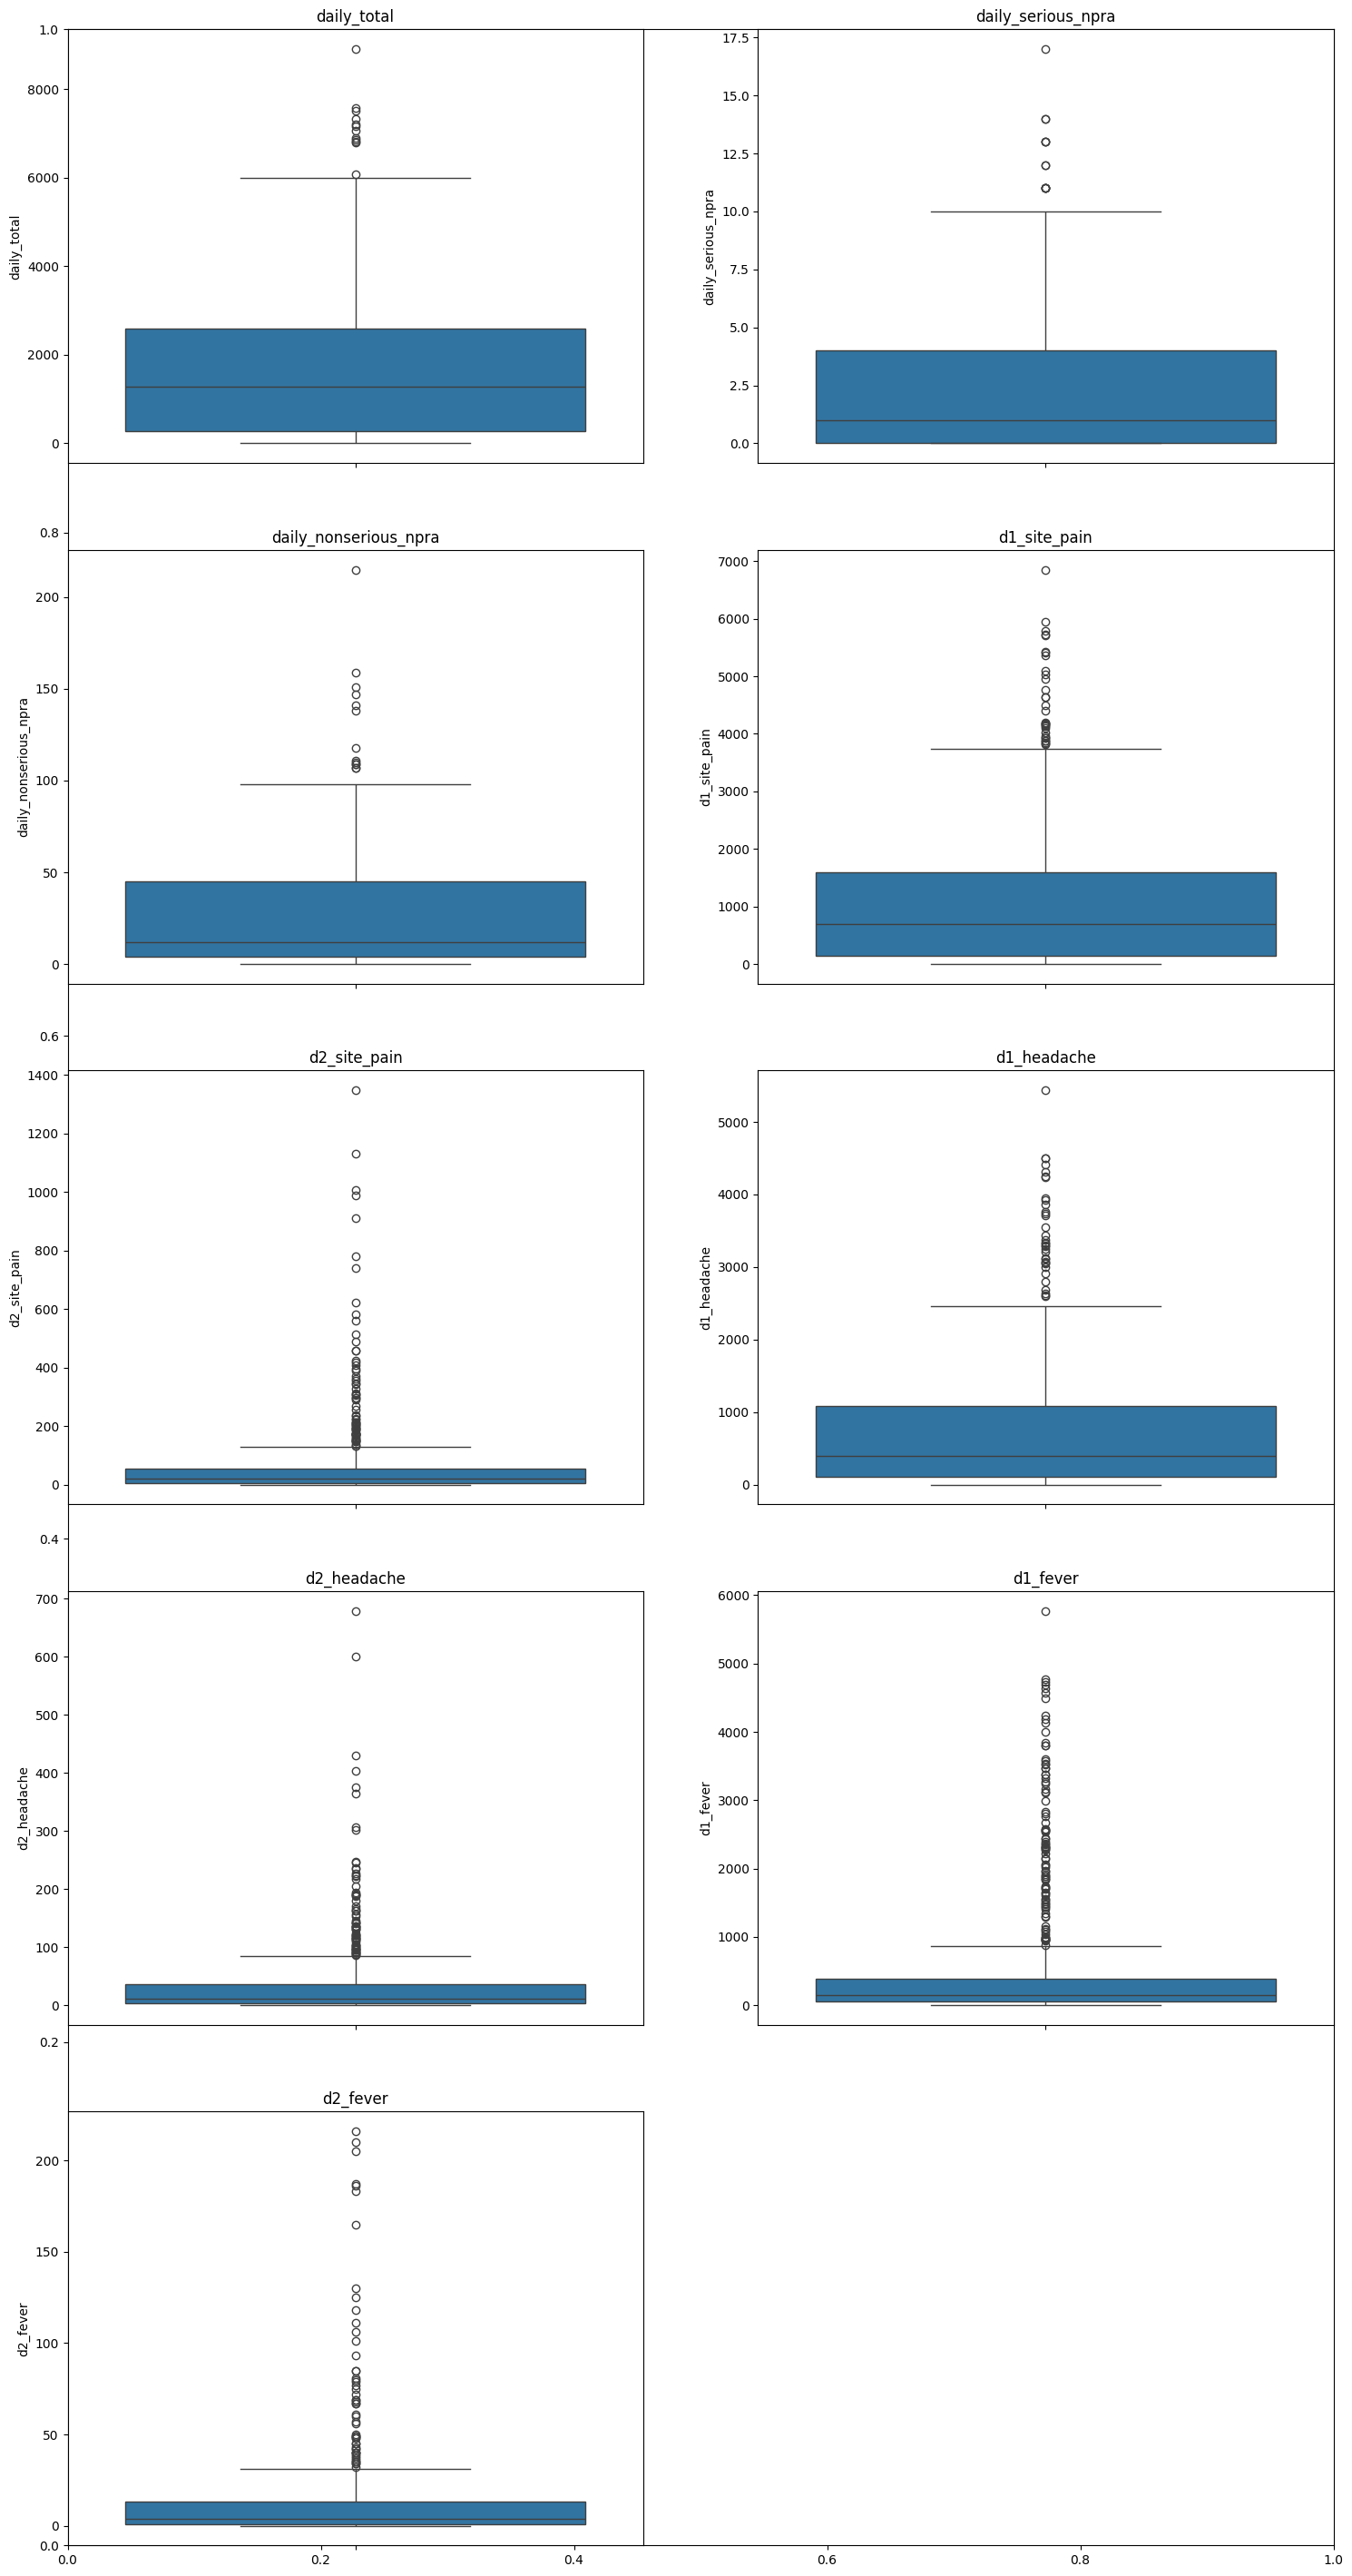

In [9]:
# Perform analysis for numerical variables
plt.subplots(figsize=(18, 36)) 
for i, col in enumerate(['daily_total', 'daily_serious_npra', 'daily_nonserious_npra', 
    'd1_site_pain', 'd2_site_pain', 'd1_headache', 'd2_headache', 'd1_fever', 'd2_fever']): 
    plt.subplot(5, 2, i+1) 
    sns.boxplot(data[col]) .set_title(col)
plt.show() 

<Axes: >

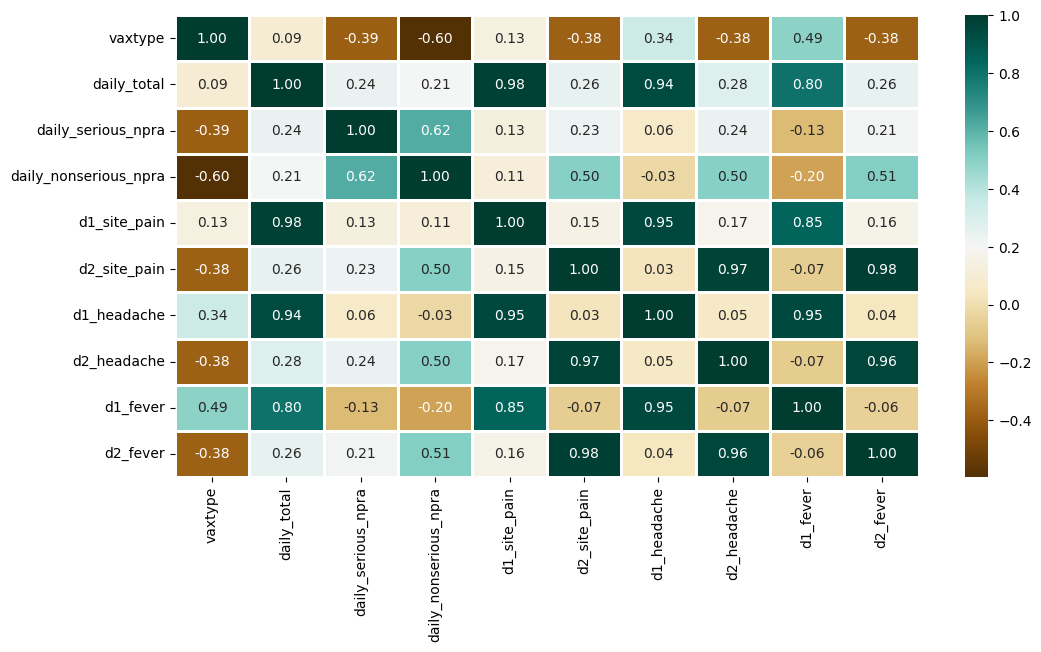

In [10]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

Data Pre Processing


In [11]:
# Check If there's any missing value
data.isna().sum()

vaxtype                  0
daily_total              0
daily_serious_npra       0
daily_nonserious_npra    0
d1_site_pain             0
d2_site_pain             0
d1_headache              0
d2_headache              0
d1_fever                 0
d2_fever                 0
dtype: int64

In [12]:
# Check if there's any duplicated data
# if duplicated use this data = data.drop_duplicates()
data.duplicated().any()

np.False_

Data Splitting

In [13]:
# X (Features)
X = data[['daily_total', 'daily_serious_npra', 'daily_nonserious_npra', 
          'd1_site_pain', 'd2_site_pain', 'd1_headache', 'd2_headache', 
          'd1_fever', 'd2_fever']]

# Y (Target)
Y = data['vaxtype']
X.shape, Y.shape

((532, 9), (532,))

In [15]:
# Addressed data imbalanced issue 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
 
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({1: 150, 2: 138, 0: 137})
Class distribution after SMOTE: Counter({2: 150, 1: 150, 0: 150})


In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Display class distribution before SMOTE for testing data
print("Class distribution before SMOTE (testing data):", Counter(y_test))

# Apply SMOTE to oversample the minority class for testing data
smote_test = SMOTE(sampling_strategy='auto', random_state=42)
X_test_resampled, y_test_resampled = smote_test.fit_resample(X_test, y_test)

# Display class distribution after SMOTE for testing data
print("Class distribution after SMOTE (testing data):", Counter(y_test_resampled))

Class distribution before SMOTE (testing data): Counter({0: 47, 1: 34, 2: 26})
Class distribution after SMOTE (testing data): Counter({0: 47, 1: 47, 2: 47})


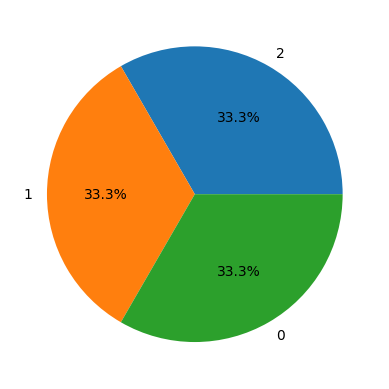

In [17]:
temp = y_train_resampled.value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 